In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv("twitter_training.csv", sep='\t', header=None, names=['id', 'game', 'sentiment', 'text'])

In [59]:
df.head()

,id,game,sentiment,text
0,"2401,Borderlands,Positive,""im getting on borde...",NaN,NaN,NaN
1,"2401,Borderlands,Positive,""I am coming to the ...",NaN,NaN,NaN
2,"2401,Borderlands,Positive,""im getting on borde...",NaN,NaN,NaN
3,"2401,Borderlands,Positive,""im coming on border...",NaN,NaN,NaN
4,"2401,Borderlands,Positive,""im getting on borde...",NaN,NaN,NaN


In [60]:
df.describe()

,game,sentiment,text
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [61]:
df.shape

(74682, 4)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         74682 non-null  object 
 1   game       0 non-null      float64
 2   sentiment  0 non-null      float64
 3   text       0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 2.3+ MB


In [63]:
df.dtypes

id            object
game         float64
sentiment    float64
text         float64
dtype: object

In [64]:
df.isnull().sum()

id               0
game         74682
sentiment    74682
text         74682
dtype: int64

In [65]:
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

id           0.0
game         0.0
sentiment    0.0
text         0.0
dtype: float64

In [67]:
df.duplicated().sum()

0

In [68]:
df.drop_duplicates(inplace=True)

,id,game,sentiment,text


In [69]:
df.duplicated().sum()

0

In [70]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [71]:
# Download NLTK resources (if not already downloaded)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [73]:
# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

In [40]:
pip install textblob 


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 657.6 kB/s eta 0:00:01
   ------ ------------------------------- 112.6/626.3 kB 656.4 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 655.8 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/626.3 kB 655.4 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/626.3 kB 692.4 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/626.3 kB 714.4 kB/s eta 0:00:01
   ----------------- -------------------- 286.7/626.3 kB 707.1 kB/s eta 0:00:01
   -----

In [74]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Classify sentiment based on score (example threshold, adjust as needed)
df['predicted_sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

In [75]:
# Apply sentiment analysis
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

In [76]:
# Classify sentiment based on score (example threshold, adjust as needed)
df['predicted_sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

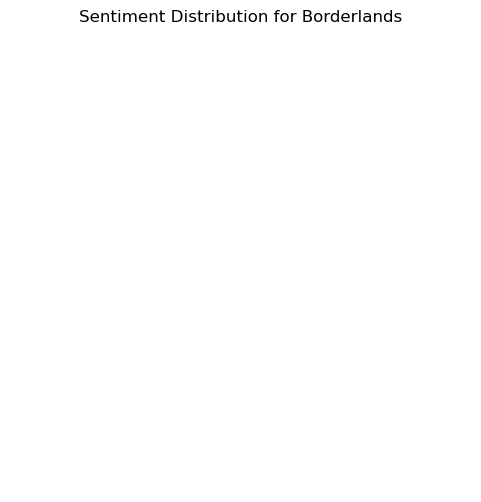

In [77]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df['predicted_sentiment'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Borderlands')
plt.show(block=True)

In [78]:
# Interpolate sentiment scores using linear interpolation
df['sentiment_score_interp'] = df['sentiment_score'].interpolate(method='linear')

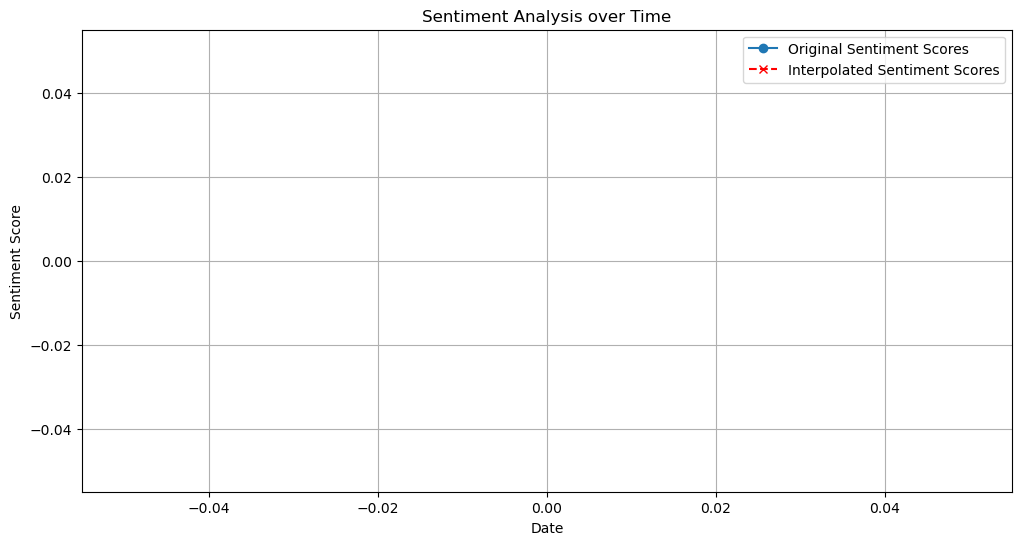

In [79]:
# Example plot commands
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sentiment_score'], marker='o', linestyle='-', label='Original Sentiment Scores')
plt.plot(df.index, df['sentiment_score_interp'], marker='x', linestyle='--', color='red', label='Interpolated Sentiment Scores')
plt.title('Sentiment Analysis over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show(block=True)